In [1]:
path = 'data/test_0.pickle'


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import pickle
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')

from matplotlib.pyplot import figure
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None

with open(path, 'rb') as f:
    data = pickle.load(f)
df = pd.DataFrame(data)

print(df.shape)
print(df.dtypes)

# отбор числовых колонок
df_numeric = df.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values
print(numeric_cols)

# отбор нечисловых колонок
df_non_numeric = df.select_dtypes(exclude=[np.number])
non_numeric_cols = df_non_numeric.columns.values
print(non_numeric_cols)

(41, 9)
timestamp            int64
title               object
category            object
href                object
date_ymd            object
date_hms            object
date_full           object
is_breaking_news      bool
article_text        object
dtype: object
['timestamp']
['title' 'category' 'href' 'date_ymd' 'date_hms' 'date_full'
 'is_breaking_news' 'article_text']


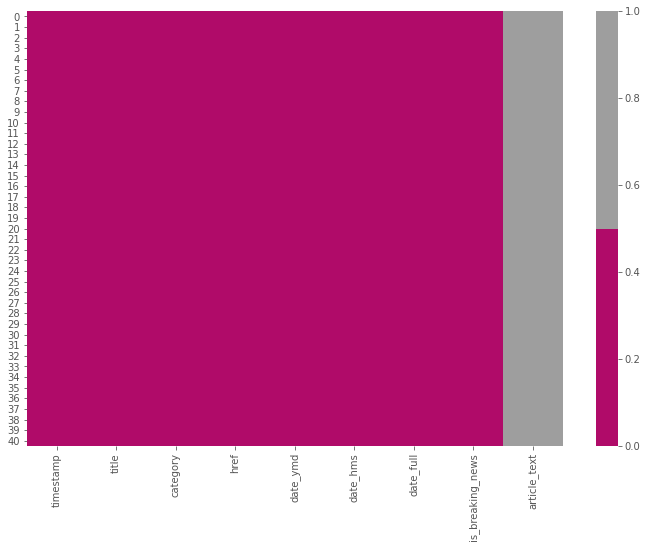

In [3]:
cols = df.columns[:30] # первые 30 колонок
colors = ['#b00b69', '#9e9e9e'] 
sns.heatmap(df[cols].isnull(), cmap=sns.color_palette(colors))